# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hri_tools import HumorDataset
from hri_tools import SUPPORTED_DATASETS
from hri_tools import downlaod
from hri_tools import calc_divergence

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download datasets

In [3]:
%env HRI_URL=###PASTE HERE###
%env HRI_PASSWORD=###PASTE HERE###

env: HRI_URL=###PASTE HERE###
env: HRI_PASSWORD=###PASTE HERE###


In [4]:
# downlaod()

# Load datasets and get statistics

In [5]:
print(SUPPORTED_DATASETS)

['pun_of_the_day', 'one_liners', 'reddit_jokes_last_laught', 'short_jokes', 'funlines_v1', 'human_microedit_v1', 'funlines_v2', 'human_microedit_v2', 'unfun_me', 'semeval_2021_task_7', 'semeval_2017_task_7', 'reddit_jokes_github']


In [6]:
all_data = list()
for name in SUPPORTED_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

In [7]:
# for i in range(len(all_data)):
#     all_data[i].calc_statistics()

# for i in range(len(all_data)):
#     all_data[i].print_statistics_report()

In [8]:
# for i in range(len(all_data)):
#     all_data[i].print_positive_sample()

# Working with vocab

In [9]:
for i in range(len(all_data)):
    all_data[i].run_preprocessing()

for i in range(len(all_data)):
    all_data[i].build_vocab()

In [29]:
print(calc_divergence(all_data[0], all_data[1]))

{'Symmetrised KL divergence': 1.1961358671103761, 'Jensen–Shannon divergence': 0.12058770793709923}


In [30]:
print(calc_divergence(all_data[1], all_data[0]))

{'Symmetrised KL divergence': 1.1961358671103761, 'Jensen–Shannon divergence': 0.12058770793709923}


In [41]:
symmetrised_kl_divergence = list()
jensen_shannon_divergence = list()

for i in range(len(all_data)):
    for j in range(len(all_data)):
        result = calc_divergence(all_data[i], all_data[j])
        symmetrised_kl_divergence.append(
            (all_data[i].name, all_data[j].name, result['Symmetrised KL divergence'])
        )

        jensen_shannon_divergence.append(
            (all_data[i].name, all_data[j].name, result['Jensen–Shannon divergence'])
        )

In [42]:
df_stat = pd.DataFrame(symmetrised_kl_divergence, columns =['Dataset_x', 'Dataset_y', 'Score'])
df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')
df_stat_pivot_symmetrised_kl = df_stat_pivot_symmetrised_kl.reindex(sorted(df_stat_pivot_symmetrised_kl.columns), axis=1)

In [43]:
df_stat = pd.DataFrame(jensen_shannon_divergence, columns =['Dataset_x', 'Dataset_y', 'Score'])
df_stat_pivot_jensen_shannon = df_stat.pivot('Dataset_x', 'Dataset_y','Score')
df_stat_pivot_jensen_shannon = df_stat_pivot_jensen_shannon.reindex(sorted(df_stat_pivot_jensen_shannon.columns), axis=1)

In [44]:
df_stat_pivot_symmetrised_kl

Dataset_y,funlines_v1,funlines_v2,human_microedit_v1,human_microedit_v2,one_liners,pun_of_the_day,reddit_jokes_github,reddit_jokes_last_laught,semeval_2017_task_7,semeval_2021_task_7,short_jokes,unfun_me
Dataset_x,,,,,,,,,,,,
funlines_v1,0.000000,0.053237,1.491806,1.441499,3.828547,3.888186,4.383818,4.306560,3.975658,4.095857,2.591244,3.481938
funlines_v2,0.053237,0.000000,1.449351,1.382718,3.829054,3.932655,4.387031,4.322429,4.011231,4.140682,2.523198,3.479624
human_microedit_v1,1.491806,1.449351,0.000000,0.070807,3.818204,3.821423,4.207997,4.193460,3.985247,4.124570,2.594131,3.508019
human_microedit_v2,1.441499,1.382718,0.070807,0.000000,3.868717,3.969019,4.272752,4.268207,4.131860,4.226892,2.528420,3.531988
one_liners,3.828547,3.829054,3.818204,3.868717,0.000000,1.196136,1.260564,1.229282,1.390759,1.007698,0.918429,3.247081
pun_of_the_day,3.888186,3.932655,3.821423,3.969019,1.196136,0.000000,1.247672,1.368241,0.725568,1.338682,1.155837,3.882769
reddit_jokes_github,4.383818,4.387031,4.207997,4.272752,1.260564,1.247672,0.000000,0.326200,1.544454,0.802365,1.454154,3.958443
reddit_jokes_last_laught,4.306560,4.322429,4.193460,4.268207,1.229282,1.368241,0.326200,0.000000,1.642091,0.794899,1.248991,3.877397
semeval_2017_task_7,3.975658,4.011231,3.985247,4.131860,1.390759,0.725568,1.544454,1.642091,0.000000,1.599964,1.403952,3.847163


In [45]:
df_stat_pivot_jensen_shannon

Dataset_y,funlines_v1,funlines_v2,human_microedit_v1,human_microedit_v2,one_liners,pun_of_the_day,reddit_jokes_github,reddit_jokes_last_laught,semeval_2017_task_7,semeval_2021_task_7,short_jokes,unfun_me
Dataset_x,,,,,,,,,,,,
funlines_v1,0.000000,0.007544,0.160113,0.162267,0.333678,0.371931,0.334505,0.371060,0.383636,0.361848,0.171113,0.331260
funlines_v2,0.007544,0.000000,0.158485,0.158788,0.328457,0.375813,0.324414,0.365791,0.390124,0.362679,0.146667,0.340136
human_microedit_v1,0.160113,0.158485,0.000000,0.009799,0.329937,0.360593,0.334852,0.368054,0.375912,0.358764,0.187168,0.326185
human_microedit_v2,0.162267,0.158788,0.009799,0.000000,0.332234,0.375652,0.329184,0.369988,0.395308,0.368128,0.159945,0.343074
one_liners,0.333678,0.328457,0.329937,0.332234,0.000000,0.120588,0.107069,0.137638,0.132167,0.118735,0.058019,0.297705
pun_of_the_day,0.371931,0.375813,0.360593,0.375652,0.120588,0.000000,0.070658,0.120128,0.093143,0.140826,0.023156,0.392484
reddit_jokes_github,0.334505,0.324414,0.334852,0.329184,0.107069,0.070658,0.000000,0.020606,0.085247,0.057779,0.146033,0.274033
reddit_jokes_last_laught,0.371060,0.365791,0.368054,0.369988,0.137638,0.120128,0.020606,0.000000,0.137272,0.090622,0.104410,0.325907
semeval_2017_task_7,0.383636,0.390124,0.375912,0.395308,0.132167,0.093143,0.085247,0.137272,0.000000,0.165768,0.024736,0.407777


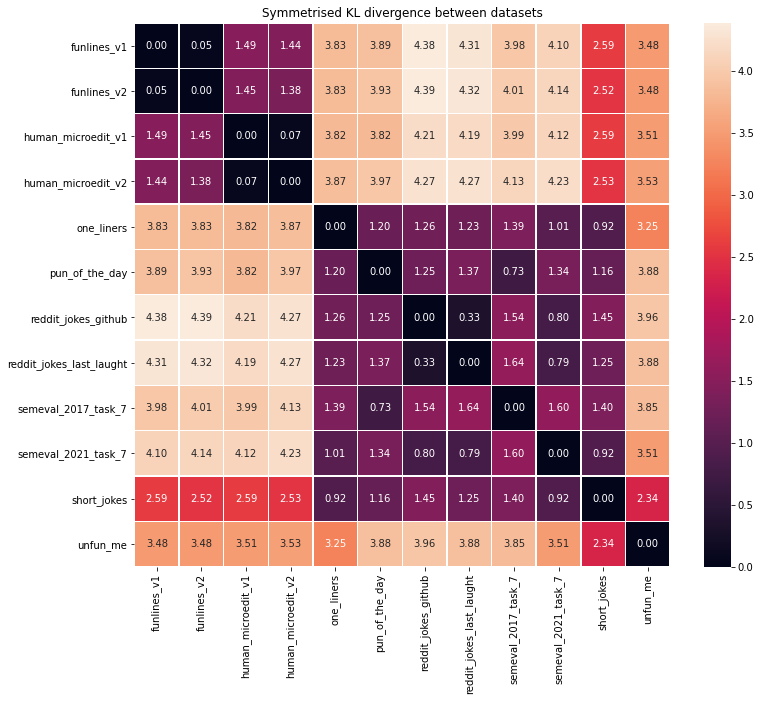

In [59]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_stat_pivot_symmetrised_kl, annot=True, fmt=".2f", ax=ax, linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.title('Symmetrised KL divergence between datasets')
plt.savefig('Symmetrised KL divergence between datasets.png')

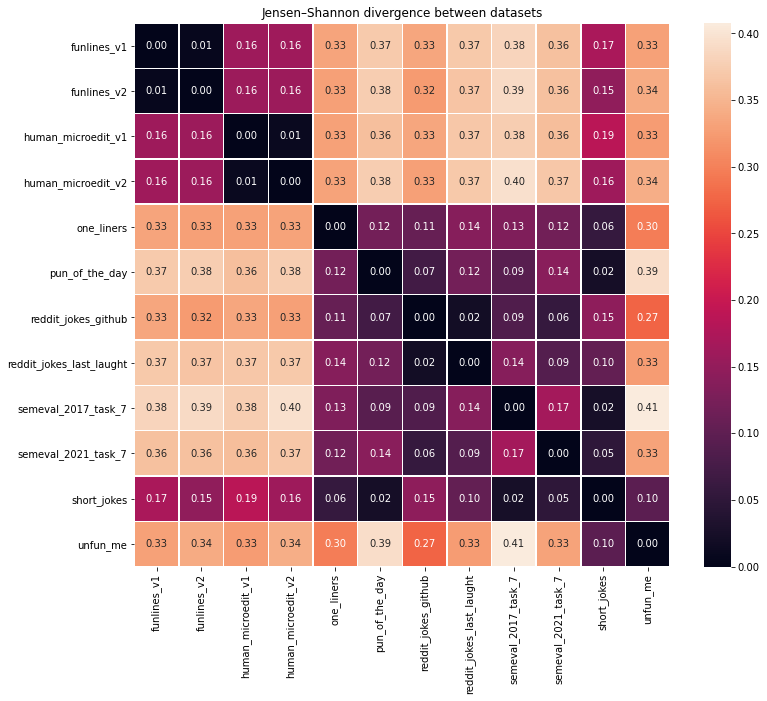

In [60]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_stat_pivot_jensen_shannon, annot=True, fmt=".2f", ax=ax, linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.title('Jensen–Shannon divergence between datasets')
plt.savefig('Jensen–Shannon divergence between datasets.png')

# Show vocab size

In [66]:
for i in range(len(all_data)):
    print(f'{all_data[i].name} | vocab_size:{all_data[i].vocab_size} | non unique words: {all_data[i].non_unique_words}')

pun_of_the_day | vocab_size:7491 | non unique words: 65227
one_liners | vocab_size:27905 | non unique words: 338553
reddit_jokes_last_laught | vocab_size:33560 | non unique words: 614460
short_jokes | vocab_size:579276 | non unique words: 17708079
funlines_v1 | vocab_size:13160 | non unique words: 179302
human_microedit_v1 | vocab_size:13599 | non unique words: 285767
funlines_v2 | vocab_size:11262 | non unique words: 107789
human_microedit_v2 | vocab_size:10135 | non unique words: 135829
unfun_me | vocab_size:6300 | non unique words: 33905
semeval_2021_task_7 | vocab_size:17163 | non unique words: 208819
semeval_2017_task_7 | vocab_size:7916 | non unique words: 43985
reddit_jokes_github | vocab_size:185332 | non unique words: 8796099
